Import library and `df.describe()` method in pandas

In [ ]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np

**Inner Joins**

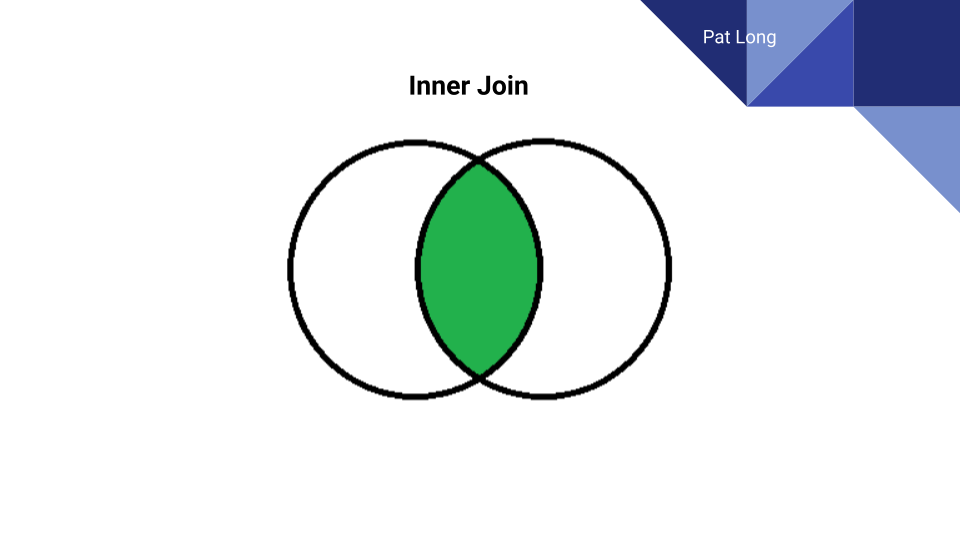


Two examples using fisher's iris dataset:
1.   using a column they have in common
2.   Using the index (convenient but rare) 



In [ ]:
# inner join using column in commmon between the two datasets
iris = datasets.load_iris()
#print(iris.DESCR)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['iris_id'] = range(1, len(iris_df)+1)
iris_df['target_name'] = iris_df['target'].apply(lambda x: iris.target_names[x])

#print(iris_df.head(5))

iris_df1 = iris_df.drop(['target'], axis=1)
iris_df2 = iris_df.drop(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], axis=1)
iris_sampled_df1 = iris_df1.sample(n=50)
iris_sampled_df2 = iris_df2.sample(n=50)

merged_iris_df = pd.merge(iris_sampled_df1, iris_sampled_df2, how='inner', on='iris_id')

print(merged_iris_df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 6.1               3.0                4.6               1.4   
1                 7.6               3.0                6.6               2.1   
2                 6.3               2.9                5.6               1.8   
3                 6.0               2.9                4.5               1.5   
4                 6.7               3.0                5.2               2.3   
5                 5.5               2.3                4.0               1.3   
6                 6.1               2.6                5.6               1.4   
7                 6.0               2.2                5.0               1.5   
8                 6.1               3.0                4.9               1.8   
9                 5.0               3.4                1.5               0.2   
10                7.7               2.6                6.9               2.3   
11                6.7               3.3 

In [ ]:
# inner join using left_index and right_index
iris = datasets.load_iris()
#print(iris.DESCR)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
#print(iris_df.head(5))

iris_df1 = iris_df.drop(['target'], axis=1)
iris_df2 = iris_df.drop(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], axis=1)

merged_iris_df = pd.merge(iris_df1, iris_df2, left_index=True, right_index=True, how='inner')

print(merged_iris_df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

Left Joins

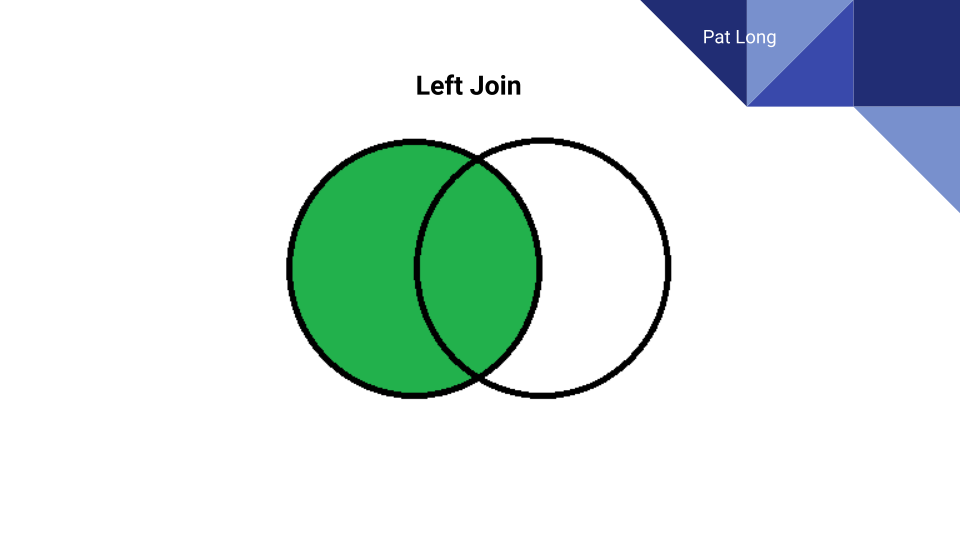

In [ ]:
#left join

# Load the diabetes and linnerud datasets
diabetes = datasets.load_diabetes()
linnerud = datasets.load_linnerud()

# Create a DataFrame for the diabetes and linnerud data
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
linnerud_df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)

diabetes_df['id'] = np.random.permutation(diabetes_df.index)
linnerud_df['id'] = np.random.permutation(linnerud_df.index)

left_join_df = pd.merge(diabetes_df, linnerud_df, how='left', on='id')

print(diabetes_df)
print(linnerud_df)
print(left_join_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6   id  
0   -0.002592  0.019908 -0.017646 

**Right Join**
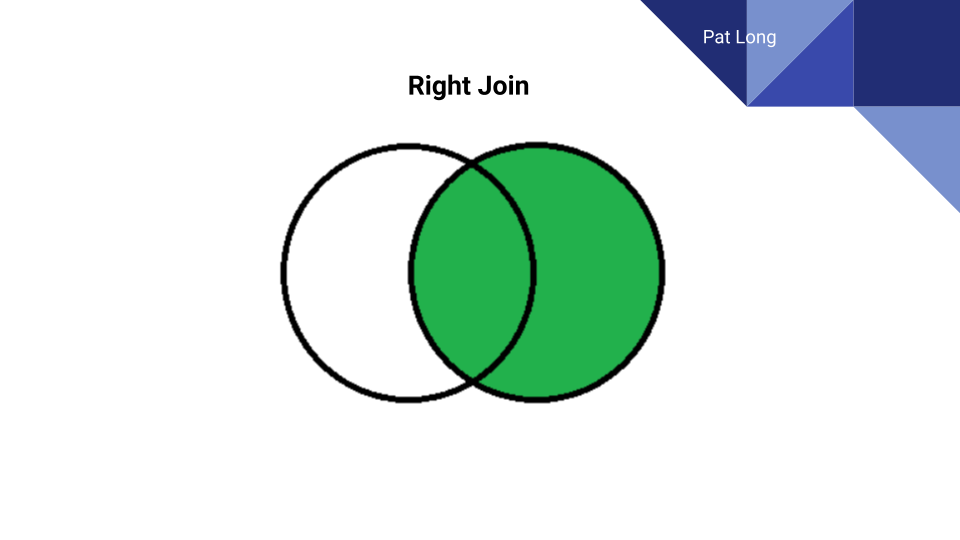

In [ ]:
#right join
#same data used in left join example

right_join_df = pd.merge(diabetes_df, linnerud_df, how='right', on='id')

print(diabetes_df)
print(linnerud_df)
print(right_join_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6   id  
0   -0.002592  0.019908 -0.017646 

**Full Join**
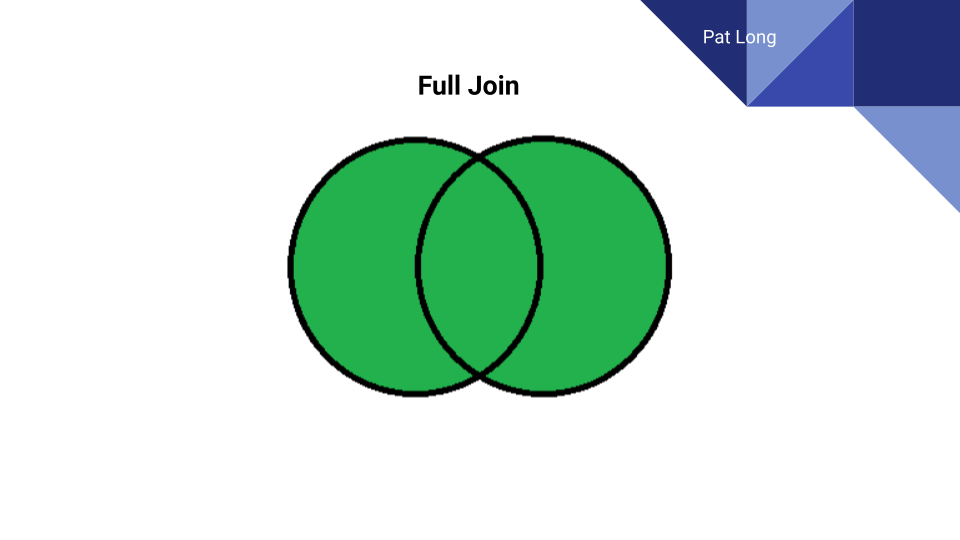

In [ ]:
# same data as right and left for first part. Then we'll manipulate the id column in the linnerud 
# dataset to get a more illustrative example.

full_join_df = pd.merge(diabetes_df, linnerud_df, how='outer', on='id')

print(diabetes_df)
print(linnerud_df)
print(full_join_df)

linnerud2_df = linnerud_df
linnerud2_df['id'] = linnerud2_df['id']**3
full_join2_df = pd.merge(diabetes_df, linnerud2_df, how='outer', on='id')

print(diabetes_df)
print(linnerud2_df)
print(full_join2_df.tail(5))


          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6   id  
0   -0.002592  0.019908 -0.017646 